In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinodbarel","key":"af99bedc46857a22cd51b3d1cfb21a54"}'}

In [4]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [64]:
!kaggle datasets download -d iamhungundji/dysarthria-detection

dysarthria-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip *.zip

In [9]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
import IPython.display as ipd

#Reading the Data



In [65]:
dataset = pd.read_csv('/content/torgo_data/data.csv')
dataset

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
...,...,...,...
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav


#Visualize the waveplot, **MFCC**, and **Mel Spectrogram** for any 1 random sample of 
1. dysarthric male
2. dysarthric female
3. non-dysarthric male and 
4. non-dysarthric female

In [66]:
def get_waveplot(path, target, gender):
  x, sr = librosa.load(path)
  plt.figure(figsize=(16,5))
  librosa.display.waveplot(x, sr=sr)
  plt.title('Waveplot of '+target+' '+gender)
  plt.show()

# Visualize the waveplot for dysarthric male

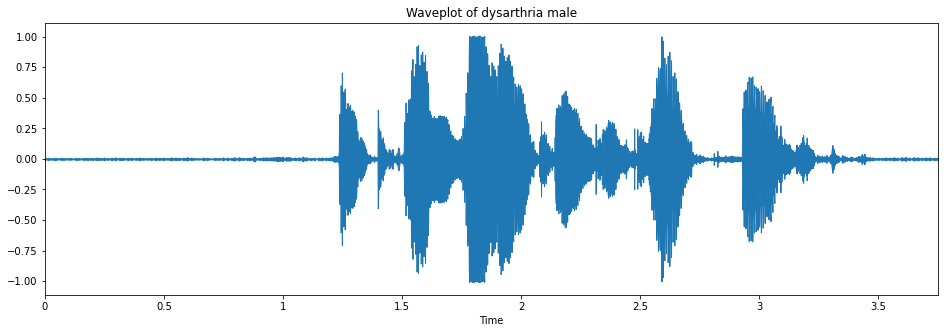

In [67]:
sam_df = dataset[(dataset['is_dysarthria']=='dysarthria') & (dataset['gender']=='male')]
get_waveplot(sam_df['filename'].values[1], sam_df['is_dysarthria'].values[1], 
             sam_df['gender'].values[1])
ipd.Audio(sam_df['filename'].values[1])

In [68]:
sam_df.head()

,is_dysarthria,gender,filename
1500,dysarthria,male,torgo_data/dysarthria_male/M01_Session2_3_0171...
1501,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0398.wav
1502,dysarthria,male,torgo_data/dysarthria_male/M01_Session2_3_0109...
1503,dysarthria,male,torgo_data/dysarthria_male/M04_Session2_0167.wav
1504,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0124.wav


#Visualize the waveplot for dysarthric female

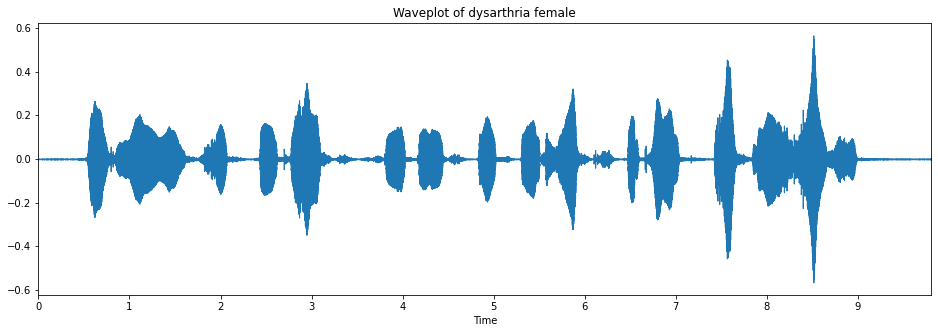

In [14]:
sam_df = dataset[(dataset['is_dysarthria']=='dysarthria') & (dataset['gender']=='female')]
get_waveplot(sam_df['filename'].values[5], sam_df['is_dysarthria'].values[5], 
             sam_df['gender'].values[5])
ipd.Audio(sam_df['filename'].values[5])

#Visualize the waveplot for non dysarthric male

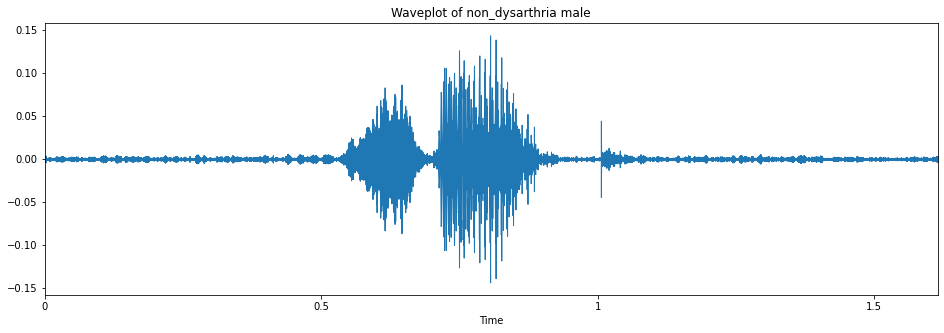

In [15]:
sam_df = dataset[(dataset['is_dysarthria']=='non_dysarthria') & (dataset['gender']=='male')]
get_waveplot(sam_df['filename'].values[5], sam_df['is_dysarthria'].values[5], 
             sam_df['gender'].values[5])
ipd.Audio(sam_df['filename'].values[5])

#Visualize the waveplot for non dysarthric female

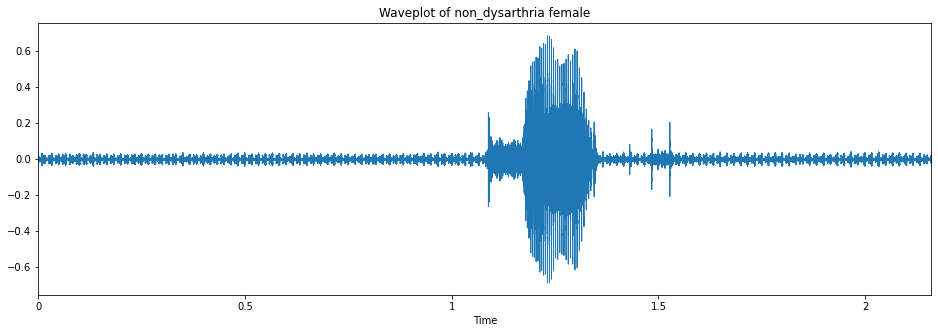

In [16]:
sam_df = dataset[(dataset['is_dysarthria']=='non_dysarthria') & (dataset['gender']=='female')]
get_waveplot(sam_df['filename'].values[2], sam_df['is_dysarthria'].values[2], 
             sam_df['gender'].values[2])
ipd.Audio(sam_df['filename'].values[2])

#MFCC feature extraction

In [17]:
def get_mfcc(path, target, gender):
  x, sr = librosa.load(path)
  mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
  print(mfccs.shape)
  plt.figure(figsize=(16,5))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  plt.title('MFCC Spectral of '+target+' '+gender)
  plt.show()

(20, 87)


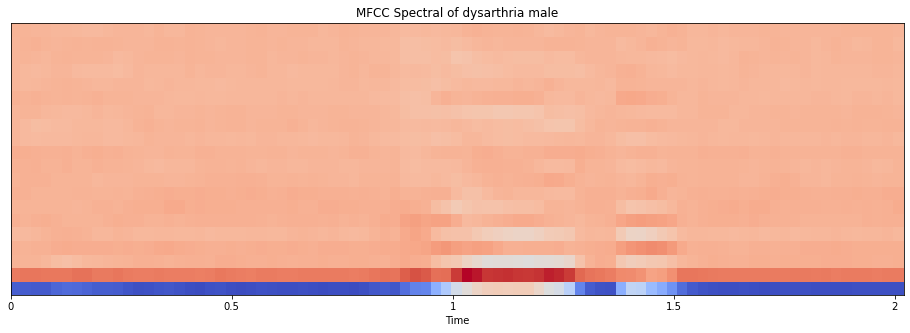

In [18]:
sam_df = dataset[(dataset['is_dysarthria']=='dysarthria') & (dataset['gender']=='male')]
get_mfcc(sam_df['filename'].values[15], sam_df['is_dysarthria'].values[15], 
             sam_df['gender'].values[15])
ipd.Audio(sam_df['filename'].values[15])

(20, 69)


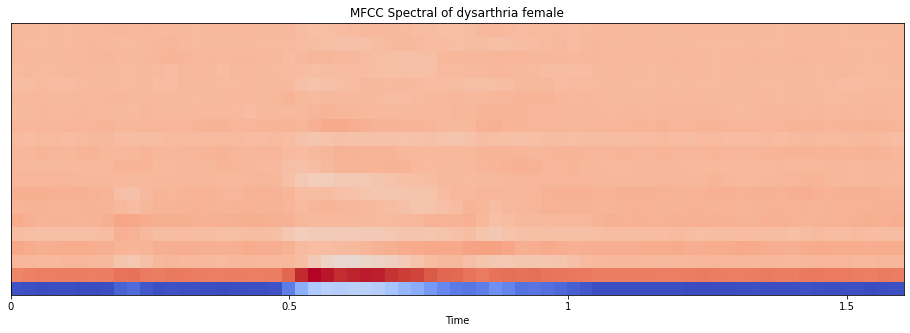

In [19]:
sam_df = dataset[(dataset['is_dysarthria']=='dysarthria') & (dataset['gender']=='female')]
get_mfcc(sam_df['filename'].values[1], sam_df['is_dysarthria'].values[1], 
             sam_df['gender'].values[1])
ipd.Audio(sam_df['filename'].values[1])

(20, 109)


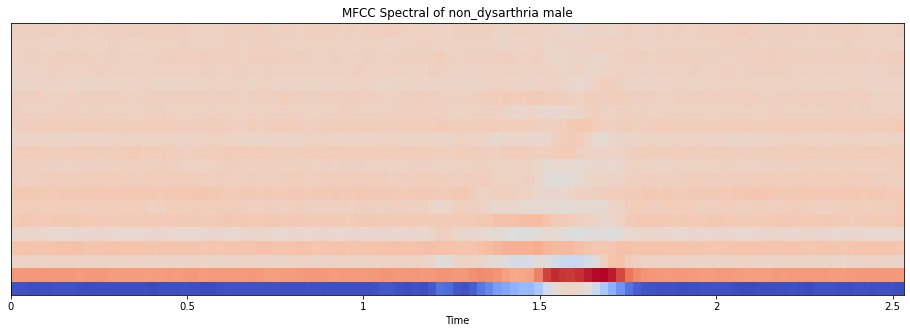

In [20]:
sam_df = dataset[(dataset['is_dysarthria']=='non_dysarthria') & (dataset['gender']=='male')]
get_mfcc(sam_df['filename'].values[1], sam_df['is_dysarthria'].values[1], 
             sam_df['gender'].values[1])
ipd.Audio(sam_df['filename'].values[1])

(20, 94)


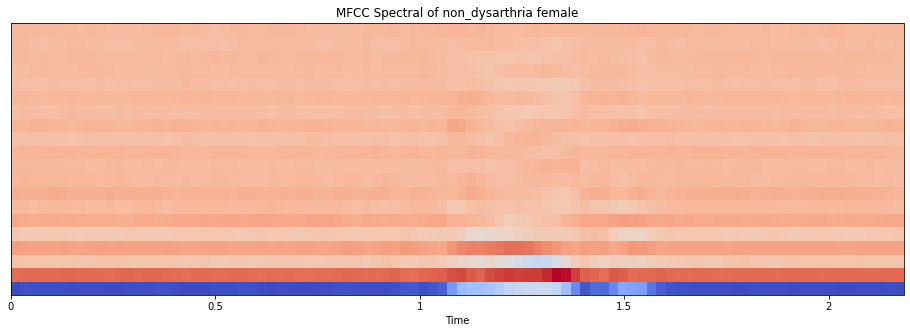

In [21]:
sam_df = dataset[(dataset['is_dysarthria']=='non_dysarthria') & (dataset['gender']=='female')]
get_mfcc(sam_df['filename'].values[2], sam_df['is_dysarthria'].values[2], 
             sam_df['gender'].values[2])
ipd.Audio(sam_df['filename'].values[2])

In [22]:
def get_melspec(path, target, gender):
  x, sr = librosa.load(path)
  melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
  print(melspec.shape)
  plt.figure(figsize=(20,5))
  librosa.display.specshow(melspec, sr=sr, x_axis='time')
  plt.title('Mel Spectrogram of '+target+' '+gender)
  plt.show()

(128, 162)


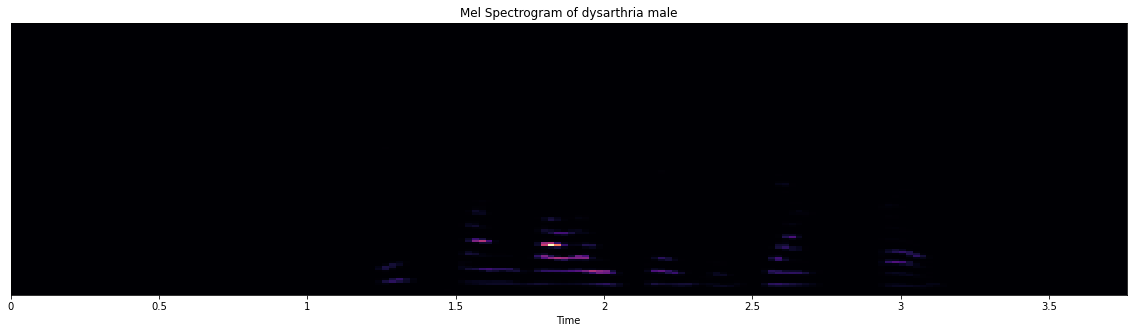

In [23]:
sam_df = dataset[(dataset['is_dysarthria']=='dysarthria') & (dataset['gender']=='male')]
get_melspec(sam_df['filename'].values[1], sam_df['is_dysarthria'].values[1], 
             sam_df['gender'].values[1])
ipd.Audio(sam_df['filename'].values[1])

(128, 69)


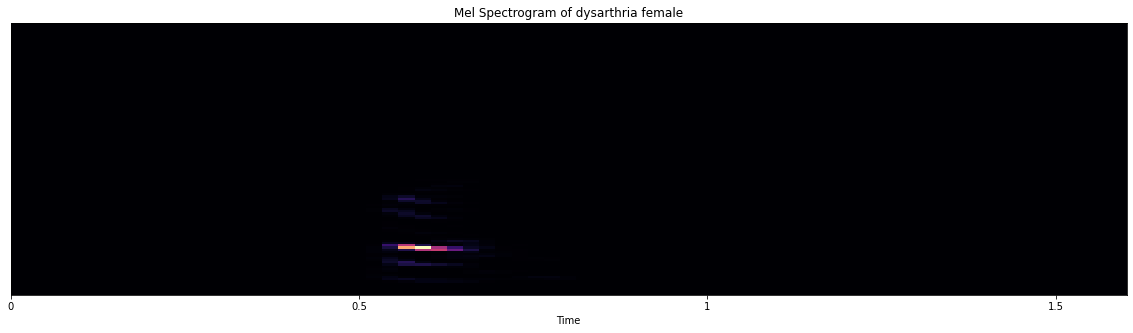

In [24]:
sam_df = dataset[(dataset['is_dysarthria']=='dysarthria') & (dataset['gender']=='female')]
get_melspec(sam_df['filename'].values[1], sam_df['is_dysarthria'].values[1], 
             sam_df['gender'].values[1])
ipd.Audio(sam_df['filename'].values[1])

(128, 137)


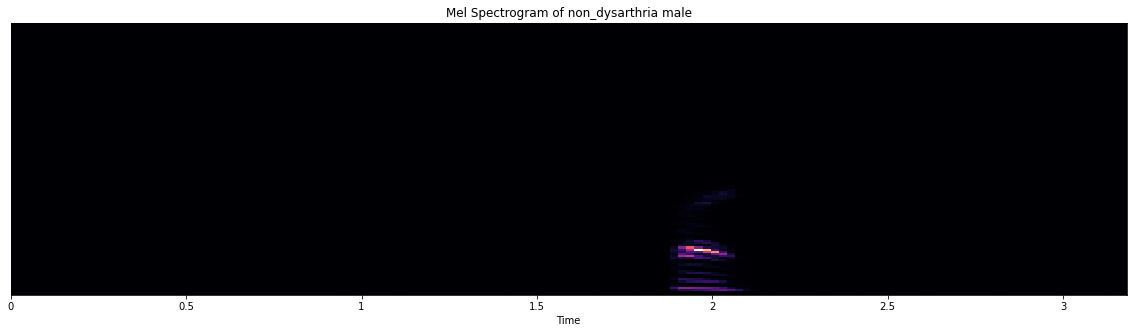

In [25]:
sam_df = dataset[(dataset['is_dysarthria']=='non_dysarthria') & (dataset['gender']=='male')]
get_melspec(sam_df['filename'].values[3], sam_df['is_dysarthria'].values[3], 
             sam_df['gender'].values[3])
ipd.Audio(sam_df['filename'].values[3])

(128, 94)


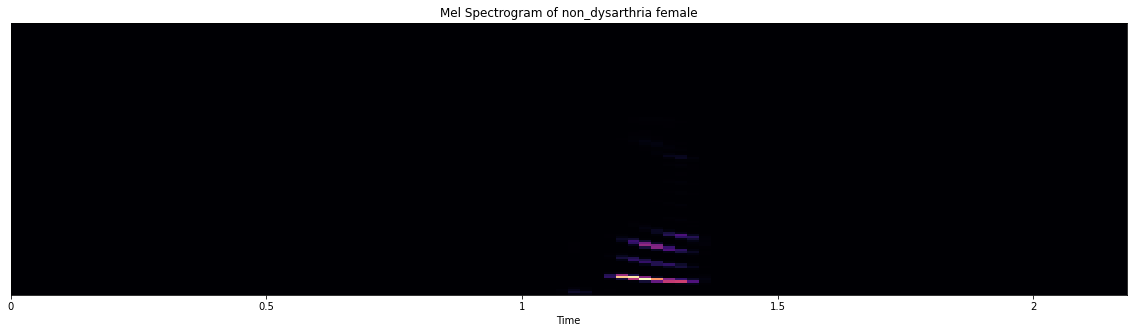

In [26]:
sam_df = dataset[(dataset['is_dysarthria']=='non_dysarthria') & (dataset['gender']=='female')]
get_melspec(sam_df['filename'].values[2], sam_df['is_dysarthria'].values[2], 
             sam_df['gender'].values[2])
ipd.Audio(sam_df['filename'].values[2])

#Create 256 MFCC features for any given audio file



In [69]:
def create_mfcc_features(path):
  mfccs=[]
  try:
    x, sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
    mfccs = np.mean(mfccs.T, axis=0)
  except:
    print('Error found in audio')
  return mfccs

In [70]:
%%time
data_frame = pd.DataFrame(dataset['filename'].apply(lambda x:create_mfcc_features(x)).tolist())

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error found in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


CPU times: user 1min 44s, sys: 1min 17s, total: 3min 2s
Wall time: 1min 35s


In [29]:
data_frame.head()


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [71]:
data_frame.shape


(2000, 128)

In [72]:
encoder = LabelEncoder()
encoder.fit(dataset['is_dysarthria'])
y = encoder.transform(dataset['is_dysarthria'])

In [73]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
dataframe_post=pd.concat([pd.DataFrame(data_frame), pd.DataFrame(y)], axis=1)


In [75]:
dataframe_post=dataframe_post.dropna()


In [76]:
data_frame=dataframe_post.iloc[:,:-1]


In [77]:
y=dataframe_post.iloc[:,-1:]


#Split the data 




In [78]:
x_train, x_val, y_train, y_val = train_test_split(np.array(data_frame), y, test_size=0.1)


In [79]:
x_train.shape, x_val.shape


((1799, 128), (200, 128))

In [80]:
y_train.head()


,0
1286,1
1473,1
957,0
66,1
933,0


#Reshaping the MFCC features for CNN



In [82]:
x_train = x_train.reshape(x_train.shape[0],16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [83]:
len(dataset['is_dysarthria'].unique())


2

#Building the CNN model



In [84]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 32)          0         
                                                                 
 flatten (Flatten)           (None, 256)               0

In [85]:
from tensorflow import keras
output = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=output, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [86]:
x_train.shape, y_train.shape


((1799, 16, 8, 1), (1799, 1))

In [87]:
history = model.fit(x_train,y_train,epochs=100)


Epoch 1/100
57/57 [==============================] - 2s 14ms/step - loss: 1.1650 - accuracy: 0.5520 - recall: 0.5006
Epoch 2/100
57/57 [==============================] - 1s 13ms/step - loss: 0.6415 - accuracy: 0.6348 - recall: 0.5916
Epoch 3/100
57/57 [==============================] - 1s 13ms/step - loss: 0.5857 - accuracy: 0.6965 - recall: 0.7381
Epoch 4/100
57/57 [==============================] - 1s 13ms/step - loss: 0.5113 - accuracy: 0.7298 - recall: 0.7703
Epoch 5/100
57/57 [==============================] - 1s 14ms/step - loss: 0.4823 - accuracy: 0.7721 - recall: 0.7891
Epoch 6/100
57/57 [==============================] - 1s 13ms/step - loss: 0.4355 - accuracy: 0.8027 - recall: 0.7969
Epoch 7/100
57/57 [==============================] - 1s 13ms/step - loss: 0.3868 - accuracy: 0.8316 - recall: 0.8335
Epoch 8/100
57/57 [==============================] - 1s 13ms/step - loss: 0.3545 - accuracy: 0.8521 - recall: 0.8502
Epoch 9/100
57/57 [==============================] - 1s 13ms/ste

In [89]:
output2 = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.7,beta_2=0.87)
model.compile(optimizer=output2, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])


In [90]:
history = model.fit(x_train,y_train,epochs=30)


Epoch 1/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0492 - accuracy: 0.9822 - recall_1: 0.9878
Epoch 2/30
57/57 [==============================] - 1s 12ms/step - loss: 0.0383 - accuracy: 0.9867 - recall_1: 0.9834
Epoch 3/30
57/57 [==============================] - 1s 12ms/step - loss: 0.0212 - accuracy: 0.9928 - recall_1: 0.9900
Epoch 4/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0240 - accuracy: 0.9922 - recall_1: 0.9922
Epoch 5/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0161 - accuracy: 0.9956 - recall_1: 0.9933
Epoch 6/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0133 - accuracy: 0.9972 - recall_1: 0.9956
Epoch 7/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0186 - accuracy: 0.9944 - recall_1: 0.9922
Epoch 8/30
57/57 [==============================] - 1s 14ms/step - loss: 0.0166 - accuracy: 0.9939 - recall_1: 0.9945
Epoch 9/30
57/57 [==============================] - 1s 2

#Evaluating the model



In [91]:
model.evaluate(x_val,y_val)


7/7 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 0.9900 - recall_1: 1.0000


[0.02126467414200306, 0.9900000095367432, 1.0]

In [92]:
y_pred = model.predict(x_val)


# ROC AUC Score



In [93]:
from sklearn.metrics import roc_auc_score,recall_score,confusion_matrix
roc_auc_score(y_val, y_pred)

1.0

In [95]:
pred_val = np.round(y_pred)


#Recall Score



In [96]:
print(recall_score(y_val,  pred_val))


1.0


#Confusion Matrix



In [97]:
pd.DataFrame(confusion_matrix(y_val,pred_val),columns=np.sort(dataset['is_dysarthria'].unique()),index=np.sort(dataset['is_dysarthria'].unique()))


,dysarthria,non_dysarthria
dysarthria,99,2
non_dysarthria,0,99
